In [334]:
# import packages
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

In [335]:
# read in neighborhood data
neighborhoods = gpd.read_file("data/Neighborhood Association Boundaries (GIS).geojson")
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,(POLYGON ((-86.79511056795417 36.1757596496334...
1,Charlotte Park,(POLYGON ((-86.87459668651866 36.1575770268129...
2,Hillwood,(POLYGON ((-86.87613708067906 36.1355409894979...
3,West Meade,"(POLYGON ((-86.9038380396094 36.1255414807897,..."
4,White Bridge,(POLYGON ((-86.86321427797685 36.1288622289404...


In [336]:
# read in bike racks data
bike_racks = pd.read_csv("data/BikeRacks.csv")
bike_racks.head()

,the_geom,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle
0,POINT (-86.65545277788506 36.04992777776401),1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260503 36.185280037810124),2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966663 36.158421598626106),3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.6865259267347 36.187546694847676),4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308803 36.172455406173995),5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept


In [337]:
# rename columns
bike_racks.columns = ['Geom','ID','Type','Domain','Status','IDNumber','Quantity','Location','Capacity','Lng','Lat','Detail','Data_Coll']
bike_racks.head()

,Geom,ID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,Lng,Lat,Detail,Data_Coll
0,POINT (-86.65545277788506 36.04992777776401),1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept
1,POINT (-86.63406252260503 36.185280037810124),2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept
2,POINT (-86.62067056966663 36.158421598626106),3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept
3,POINT (-86.6865259267347 36.187546694847676),4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept
4,POINT (-86.76218008308803 36.172455406173995),5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept


In [338]:
# read in MTA stops data
mta_stops = pd.read_csv("data/mta_stops.csv")
mta_stops.head()

,Stop ID Number,Stop Abbreviation,StopName,Shelter,Bench,Route Number,Route Name,Longitude,Latitude,Mapped Location
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,"(36.106851, -86.762639)"
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,"(36.108232, -86.765569)"
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,"(36.116603, -86.766280)"
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,"(36.121603, -86.765494)"
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,"(36.124624, -86.765827)"


In [339]:
# rename columns
mta_stops.columns = ['Stop_ID_Number','Stop_Abbreviation','Stop_Name','Shelter','Bench','Route_Number','Route_Name','Lng','Lat','Mapped_Loc']
mta_stops.head()

,Stop_ID_Number,Stop_Abbreviation,Stop_Name,Shelter,Bench,Route_Number,Route_Name,Lng,Lat,Mapped_Loc
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,"(36.106851, -86.762639)"
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,"(36.108232, -86.765569)"
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,"(36.116603, -86.766280)"
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,"(36.121603, -86.765494)"
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,"(36.124624, -86.765827)"


In [340]:
bike_racks['Geom'] = bike_racks.apply(lambda x: Point((float(x.Lng), float(x.Lat))), axis=1)

In [341]:
mta_stops['Mapped_Loc'] = mta_stops.apply(lambda x: Point((float(x.Lng), float(x.Lat))), axis=1)

In [342]:
bike_racks_geo = gpd.GeoDataFrame(bike_racks, crs = neighborhoods.crs, geometry = bike_racks.Geom)

In [343]:
mta_stops_geo = gpd.GeoDataFrame(mta_stops, crs = neighborhoods.crs, geometry = mta_stops.Mapped_Loc)

In [344]:
bike_racks_geo.head()

,Geom,ID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,Lng,Lat,Detail,Data_Coll,geometry
0,POINT (-86.65545277790001 36.0499277778),1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545277790001 36.0499277778)
1,POINT (-86.6340625226 36.18528003780001),2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.6340625226 36.18528003780001)
2,POINT (-86.6206705697 36.1584215986),3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.6206705697 36.1584215986)
3,POINT (-86.6865259267 36.1875466948),4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept,POINT (-86.6865259267 36.1875466948)
4,POINT (-86.76218008309999 36.1724554062),5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218008309999 36.1724554062)


In [345]:
mta_stops_geo.head()

,Stop_ID_Number,Stop_Abbreviation,Stop_Name,Shelter,Bench,Route_Number,Route_Name,Lng,Lat,Mapped_Loc,geometry
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,POINT (-86.76263900000001 36.106851),POINT (-86.76263900000001 36.106851)
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,POINT (-86.765569 36.108232),POINT (-86.765569 36.108232)
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,POINT (-86.76628000000001 36.116603),POINT (-86.76628000000001 36.116603)
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,POINT (-86.76549399999999 36.121603),POINT (-86.76549399999999 36.121603)
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,POINT (-86.765827 36.124624),POINT (-86.765827 36.124624)


In [346]:
# join the bike racks with neighborhoods
nash_bikes = gpd.sjoin(bike_racks_geo, neighborhoods, op = 'within')
nash_bikes.head()

,Geom,ID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,Lng,Lat,Detail,Data_Coll,geometry,index_right,name
4,POINT (-86.76218008309999 36.1724554062),5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218008309999 36.1724554062),15,Historic Edgefield
111,POINT (-86.7603189731 36.1722220733),112,Rack,Public,Proposed,312,0,Elementary School,0,-86.760319,36.172222,Warner Elementary School,Health Dept,POINT (-86.7603189731 36.1722220733),15,Historic Edgefield
393,POINT (-86.7587196799 36.1740162738),394,Rack,Public,Future Artistic,415,0,Park,0,-86.758720,36.174016,East Park - Woodland St @ S 8th St,Civic,POINT (-86.7587196799 36.1740162738),15,Historic Edgefield
394,POINT (-86.76031268049999 36.1722879774),395,Rack,Public,Future Artistic,416,0,Park,0,-86.760313,36.172288,East Park - Warner Public School Entrance,Civic,POINT (-86.76031268049999 36.1722879774),15,Historic Edgefield
395,POINT (-86.7602654582 36.1722096836),396,Rack,Public,Future Artistic,417,0,Park,0,-86.760265,36.172210,East Park - Warner Public School Entrance,Civic,POINT (-86.7602654582 36.1722096836),15,Historic Edgefield


In [347]:
# join MTA stops with neighborhoods
nash_busses = gpd.sjoin(mta_stops_geo, neighborhoods, op = 'within')
nash_busses.head()

,Stop_ID_Number,Stop_Abbreviation,Stop_Name,Shelter,Bench,Route_Number,Route_Name,Lng,Lat,Mapped_Loc,geometry,index_right,name
7,463,BRAWEDNN,BRANSFORD AVE & WEDGEWOOD AVE NB,0,0,1,VINE HILL,-86.768817,36.132468,POINT (-86.768817 36.132468),POINT (-86.768817 36.132468),114,Bransford Avenue
15,228,5ACOMNN,5TH AVE N & COMMERCE ST NB,0,0,1,VINE HILL,-86.779169,36.161732,POINT (-86.779169 36.161732),POINT (-86.779169 36.161732),41,Urban Residents
16,226,5AVCHUNN,5TH AVE N & CHURCH ST NB,1,1,1,VINE HILL,-86.780078,36.163054,POINT (-86.780078 36.163054),POINT (-86.780078 36.163054),41,Urban Residents
17,224,5AVCHUNM,5TH AVE N & THE ARCADE NB,0,0,1,VINE HILL,-86.780627,36.163938,POINT (-86.780627 36.163938),POINT (-86.780627 36.163938),41,Urban Residents
18,243,6AVCHUSN,6TH AVE N & CHURCH ST SB,0,0,1,VINE HILL,-86.781601,36.162833,POINT (-86.78160099999999 36.162833),POINT (-86.78160099999999 36.162833),41,Urban Residents


In [348]:
# get the quantity of bike rack stations within each neighborhood
nash_bikes[['name','IDNumber']].groupby('name').agg('count').sort_values(by='IDNumber', ascending=False)

,IDNumber
name,
Urban Residents,51
Sylvan Park,10
Hillsboro-West End,9
Woodbine,6
Edgehill (ONE),6
Nations,6
Lockeland Springs,6
Historic Edgefield,5
Sunnyside,4


In [349]:
# get the quantity of bus stops within each neighborhood
nash_busses[['name','Stop_ID_Number']].groupby('name').agg('count').sort_values(by='Stop_ID_Number', ascending=False)

,Stop_ID_Number
name,
Urban Residents,160
Highland Heights,43
Bordeaux,32
Sunnyside,32
Edgehill (ONE),30
Lockeland Springs,30
South Inglewood (CCSI),26
Capitol View,23
Maxwell Heights,21


In [350]:
urban_bikes = nash_bikes.loc[nash_bikes.name == 'Urban Residents']
urban_bikes.head()

,Geom,ID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,Lng,Lat,Detail,Data_Coll,geometry,index_right,name
9,POINT (-86.7799546267 36.1633719897),10,Rack,Public,Future Artistic,83,0,Bus Stop,0,-86.779955,36.163372,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.7799546267 36.1633719897),41,Urban Residents
10,POINT (-86.77974046940001 36.163455453),11,Rack,Public,Existing,57,1,Bus Stop,2,-86.779740,36.163455,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.77974046940001 36.163455453),41,Urban Residents
11,POINT (-86.78151617340001 36.1623498407),12,Rack,Public,Existing,119,2,Library,4,-86.781516,36.162350,Downtown Nashville Public Library,Health Dept,POINT (-86.78151617340001 36.1623498407),41,Urban Residents
12,POINT (-86.7762348971 36.1632842775),13,Rack,Public,Proposed,258,0,Bus Stop,0,-86.776235,36.163284,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.7762348971 36.1632842775),41,Urban Residents
13,POINT (-86.7760875556 36.1631394547),14,Rack,Public,Future Artistic,259,0,Bus Stop,0,-86.776088,36.163139,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.7760875556 36.1631394547),41,Urban Residents


In [351]:
urban_polygon = neighborhoods.loc[neighborhoods.name == 'Urban Residents']
urban_polygon.head()

,name,geometry
41,Urban Residents,(POLYGON ((-86.78122053774267 36.1645653773768...


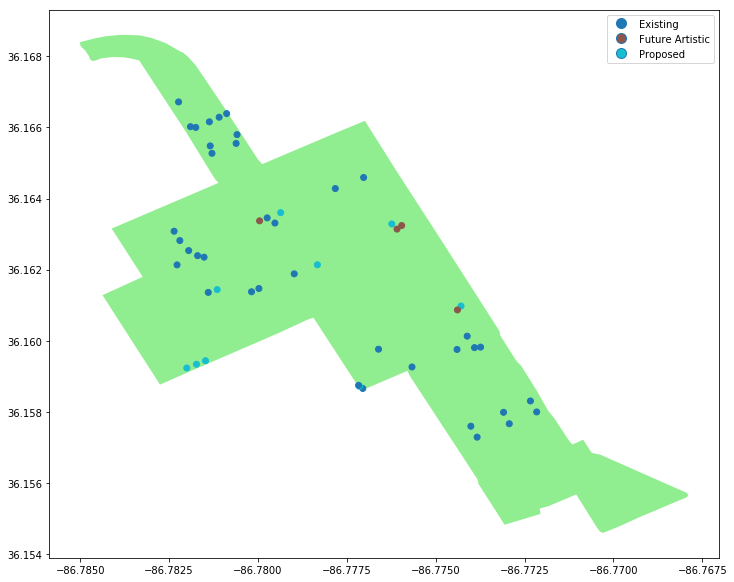

In [352]:
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
urban_bikes.plot( ax = ax, column = 'Status', legend = True);
plt.show();

In [353]:
urban_busses = nash_busses.loc[nash_busses.name == 'Urban Residents']
urban_busses.head()

,Stop_ID_Number,Stop_Abbreviation,Stop_Name,Shelter,Bench,Route_Number,Route_Name,Lng,Lat,Mapped_Loc,geometry,index_right,name
15,228,5ACOMNN,5TH AVE N & COMMERCE ST NB,0,0,1,VINE HILL,-86.779169,36.161732,POINT (-86.779169 36.161732),POINT (-86.779169 36.161732),41,Urban Residents
16,226,5AVCHUNN,5TH AVE N & CHURCH ST NB,1,1,1,VINE HILL,-86.780078,36.163054,POINT (-86.780078 36.163054),POINT (-86.780078 36.163054),41,Urban Residents
17,224,5AVCHUNM,5TH AVE N & THE ARCADE NB,0,0,1,VINE HILL,-86.780627,36.163938,POINT (-86.780627 36.163938),POINT (-86.780627 36.163938),41,Urban Residents
18,243,6AVCHUSN,6TH AVE N & CHURCH ST SB,0,0,1,VINE HILL,-86.781601,36.162833,POINT (-86.78160099999999 36.162833),POINT (-86.78160099999999 36.162833),41,Urban Residents
19,702,6AVCOMSN,6TH AVE N & COMMERCE ST SB,0,1,1,VINE HILL,-86.780728,36.161447,POINT (-86.780728 36.161447),POINT (-86.780728 36.161447),41,Urban Residents


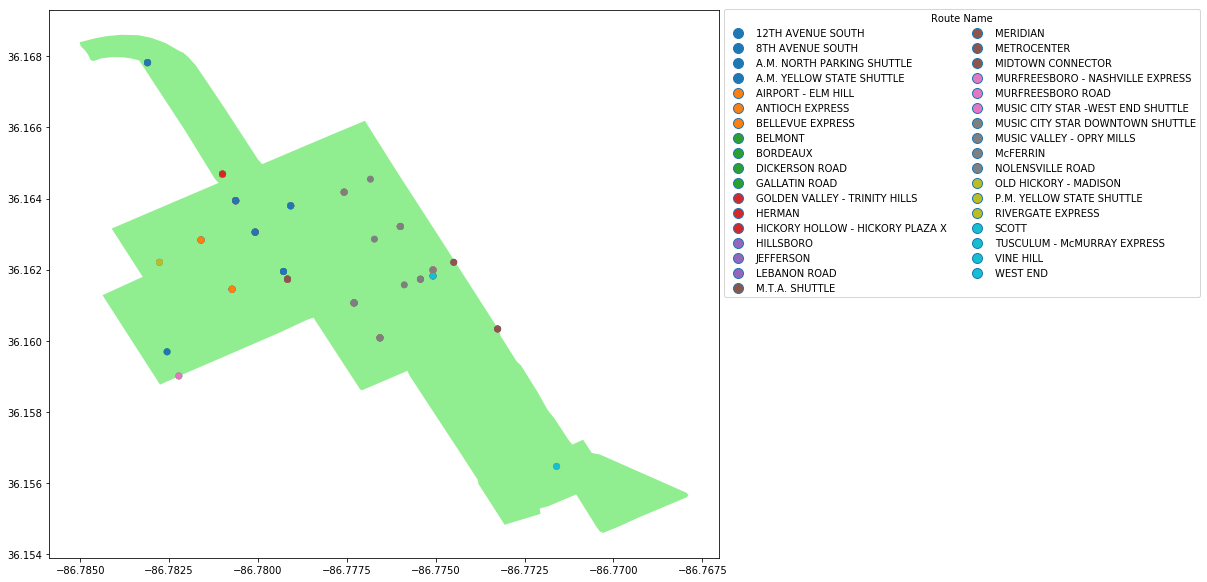

In [354]:
ax = urban_polygon.plot(figsize = (12, 12), color = 'lightgreen')
leg_kwds = {'title': 'Route Name', 'loc': 'upper left', 'bbox_to_anchor': (1, 1.01), 'ncol': 2}
urban_busses.plot( ax = ax, column = 'Route_Name', legend = True, legend_kwds = leg_kwds);
plt.show();

In [355]:
# find the center of urban polygon
center = urban_polygon.geometry.centroid
center

41    POINT (-86.77756457127047 36.16127820928791)
dtype: object

In [356]:
# get and store the first occurence
center_point = center.iloc[0]

In [357]:
# reverse the order for folium, since it wants latitude first and shapely Points have longitude first
urban_center = [center_point.y, center_point.x]
urban_center

[36.161278209287914, -86.77756457127047]

In [358]:
# create and show a map of downtown Nashville
downtown_map = folium.Map(location = urban_center, zoom_start = 15)
downtown_map

In [359]:
for row in urban_bikes.iterrows():
    row_values = row[1]
    print(row_values)

Geom                        POINT (-86.7799546267 36.1633719897)
ID                                                            10
Type                                                        Rack
Domain                                                    Public
Status                                           Future Artistic
IDNumber                                                      83
Quantity                                                       0
Location                                                Bus Stop
Capacity                                                       0
Lng                                                       -86.78
Lat                                                      36.1634
Detail         Bus Stop; Church St at 5th Ave N, Fifth Third ...
Data_Coll                                            Health Dept
geometry                    POINT (-86.7799546267 36.1633719897)
index_right                                                   41
name                     

In [360]:
# draw neighborhood
# folium.GeoJson(urban_polygon).add_to(downtown_map)

# iterate through urban bikes and create locations and markers
# note that latitude must come first for folium map to work
# for row in urban_bikes.iterrows():
#     row_values = row[1]
#     location = [row_values['Lat'], row_values['Lng']]
#     popup = (str(row_values['IDNumber']) + ': ' +
#              str(row_values['Status']) + '<br/>' +
#              'Quantity: ' + str(row_values['Quantity']) + '<br/>' +
#              str(row_values['Detail'])).replace("'", "`")
#     marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color='blue', icon='bicycle',
#                                                                                icon_color='white', prefix='fa'))
    
#     marker.add_to(downtown_map)

# # display map
# downtown_map

In [361]:
for row in urban_busses.iterrows():
    row_values = row[1]
    print(row_values)

Stop_ID_Number                                228
Stop_Abbreviation                         5ACOMNN
Stop_Name              5TH AVE N & COMMERCE ST NB
Shelter                                         0
Bench                                           0
Route_Number                                    1
Route_Name                              VINE HILL
Lng                                      -86.7792
Lat                                       36.1617
Mapped_Loc           POINT (-86.779169 36.161732)
geometry             POINT (-86.779169 36.161732)
index_right                                    41
name                              Urban Residents
Name: 15, dtype: object
Stop_ID_Number                                226
Stop_Abbreviation                        5AVCHUNN
Stop_Name                5TH AVE N & CHURCH ST NB
Shelter                                         1
Bench                                           1
Route_Number                                    1
Route_Name                

Stop_ID_Number                               3850
Stop_Abbreviation                         BRO2AWN
Stop_Name             BROADWAY AVE & 2ND AVE N WB
Shelter                                         0
Bench                                           1
Route_Number                                   38
Route_Name                        ANTIOCH EXPRESS
Lng                                      -86.7751
Lat                                        36.162
Mapped_Loc           POINT (-86.775075 36.161991)
geometry             POINT (-86.775075 36.161991)
index_right                                    41
name                              Urban Residents
Name: 2397, dtype: object
Stop_ID_Number                                       2722
Stop_Abbreviation                                2AVCOMNN
Stop_Name                      2ND AVE N & COMMERCE ST NB
Shelter                                                 0
Bench                                                   0
Route_Number                      

In [362]:
# iterate through urban busses and create locations and markers
# note that latitude must come first for folium map to work
for row in nash_busses.iterrows():
    row_values = row[1]
    location = [row_values['Lat'], row_values['Lng']]
    popup = (str(row_values['Stop_ID_Number']) + ': ' + str(row_values['Stop_Abbreviation']) + '<br/>' +
            'Stop Name: ' + str(row_values['Stop_Name']) + '<br/>' +
            'Route Name: ' + str(row_values['Route_Name']) + '<br/>' +
            'Shelter: ' + str(row_values['Shelter']) + '<br/>' +
            'Bench: ' + str(row_values['Bench'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color='red', icon='bus', 
                                                                                icon_color='white', prefix='fa'))
    
    marker.add_to(downtown_map)

# display map
downtown_map

In [363]:
# read in public health clinic location file
public_health = pd.read_csv("data/public_health_loc.csv")
public_health

,Clinic Name,Phone,Hours,Location 1
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550..."
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204..."
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -..."
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936..."


In [364]:
public_health['Location 2'] = public_health['Location 1'].apply(lambda x: x.split('\n'))
public_health

,Clinic Name,Phone,Hours,Location 1,Location 2
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155..."
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20..."
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ..."
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093..."


In [365]:
print(public_health['Location 2'])

0    [2500 Charlotte Avenue, Nashville, TN, (36.155...
1    [1015 East Trinity Lane, Nashville, TN, (36.20...
2    [224 Oriel Avenue, Nashville, TN, (36.122097, ...
3    [3718 Nolensville Pike, Nashville, TN, (36.093...
Name: Location 2, dtype: object


In [366]:
public_health['Location 2'][2][2]

'(36.122097, -86.743627)'

In [367]:
public_health['Location 3'] = [loc[2] for loc in public_health['Location 2']]

In [368]:
public_health

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","(36.155043, -86.812991)"
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","(36.204273, -86.745286)"
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","(36.122097, -86.743627)"
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","(36.093667, -86.736409)"


In [369]:
public_health['Location 3'] = public_health['Location 3'].str.replace('(','')

In [370]:
public_health['Location 3'] = public_health['Location 3'].str.replace(')','')

In [371]:
public_health

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","36.155043, -86.812991"
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","36.204273, -86.745286"
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627"
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","36.093667, -86.736409"


In [372]:
public_health['Location 4'] = public_health['Location 3'].str.split(',')

In [373]:
public_health['Lng'] = [loc[1] for loc in public_health['Location 4']]

In [374]:
public_health['Lat'] = [loc[0] for loc in public_health['Location 4']]

In [375]:
public_health

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3,Location 4,Lng,Lat
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","36.155043, -86.812991","[36.155043, -86.812991]",-86.812991,36.155043
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","36.204273, -86.745286","[36.204273, -86.745286]",-86.745286,36.204273
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627","[36.122097, -86.743627]",-86.743627,36.122097
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","36.093667, -86.736409","[36.093667, -86.736409]",-86.736409,36.093667


In [376]:
public_health['Geom'] = public_health.apply(lambda x: Point((float(x.Lng), float(x.Lat))), axis=1)
public_health

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3,Location 4,Lng,Lat,Geom
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","36.155043, -86.812991","[36.155043, -86.812991]",-86.812991,36.155043,POINT (-86.812991 36.155043)
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","36.204273, -86.745286","[36.204273, -86.745286]",-86.745286,36.204273,POINT (-86.74528599999999 36.204273)
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627","[36.122097, -86.743627]",-86.743627,36.122097,POINT (-86.743627 36.122097)
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","36.093667, -86.736409","[36.093667, -86.736409]",-86.736409,36.093667,POINT (-86.73640899999999 36.093667)


In [377]:
public_health_geo = gpd.GeoDataFrame(public_health, crs = neighborhoods.crs, geometry = public_health.Geom)
public_health_geo

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3,Location 4,Lng,Lat,Geom,geometry
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","36.155043, -86.812991","[36.155043, -86.812991]",-86.812991,36.155043,POINT (-86.812991 36.155043),POINT (-86.812991 36.155043)
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","36.204273, -86.745286","[36.204273, -86.745286]",-86.745286,36.204273,POINT (-86.74528599999999 36.204273),POINT (-86.74528599999999 36.204273)
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627","[36.122097, -86.743627]",-86.743627,36.122097,POINT (-86.743627 36.122097),POINT (-86.743627 36.122097)
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","36.093667, -86.736409","[36.093667, -86.736409]",-86.736409,36.093667,POINT (-86.73640899999999 36.093667),POINT (-86.73640899999999 36.093667)


In [378]:
public_health_geo['Lng'] = public_health_geo['Lng'].astype(float)

In [379]:
public_health_geo['Lat'] = public_health_geo['Lat'].astype(float)

In [380]:
pub_health = gpd.sjoin(public_health_geo, neighborhoods, op = 'within')
pub_health

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3,Location 4,Lng,Lat,Geom,geometry,index_right,name
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627","[36.122097, -86.743627]",-86.743627,36.122097,POINT (-86.743627 36.122097),POINT (-86.743627 36.122097),10,Woodbine


In [381]:
for row in pub_health.iterrows():
    row_values = row[1]
    location = [row_values['Lat'], row_values['Lng']]
    popup = (str(row_values['Clinic Name']) + '<br/>' +
            'Hours: ' + str(row_values['Hours']) + '<br/>' +
            'Phone: ' + str(row_values['Phone'])).replace("'", "`")
    marker = folium.Marker(location = location, popup = popup, icon=folium.Icon(color='green', icon='fa-hospital-o', 
                                                                                icon_color='white', prefix='fa'))
    
    marker.add_to(downtown_map)

# display map
downtown_map

In [382]:
zip_codes = gpd.read_file('data/zip_codes.geojson')
zip_codes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37027,34,BRENTWOOD,3140.581074908484,595244.46435546875,"(POLYGON ((-86.684745973484 35.992792089723, -..."
1,37027,37,BRENTWOOD,3558.4949049555025,315672.26501464844,"(POLYGON ((-86.719974241412 36.009524281615, -..."
2,37143,29,PEGRAM,7053.537934957626,1901096.087890625,"(POLYGON ((-87.03537311557 36.087623620297, -8..."
3,37143,28,PEGRAM,1197.1070870572601,83126.842468261719,"(POLYGON ((-87.03605109734001 36.095325458066,..."
4,37240,44,NASHVILLE,9240.7969963306841,3146698.6988525391,"(POLYGON ((-86.803254434485 36.149298486807, -..."


In [384]:
bus_stops_geo = gpd.GeoDataFrame(mta_stops, crs = zip_codes.crs, geometry = mta_stops.Mapped_Loc)

In [385]:
pub_health_clinic = gpd.GeoDataFrame(public_health, crs = zip_codes.crs, geometry = public_health_geo.Geom)

In [386]:
bus_stops_loc = gpd.sjoin(bus_stops_geo, zip_codes, op = 'within')
bus_stops_loc.head()

,Stop_ID_Number,Stop_Abbreviation,Stop_Name,Shelter,Bench,Route_Number,Route_Name,Lng,Lat,Mapped_Loc,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,1788,100OAKS,100 OAKS MALL,1,1,1,VINE HILL,-86.762639,36.106851,POINT (-86.76263900000001 36.106851),POINT (-86.76263900000001 36.106851),50,37204,14,NASHVILLE,94532.925240739496,201037271.83300781
1,1792,POWPOWNM,POWELL AVE & POWELL PL NB,0,0,1,VINE HILL,-86.765569,36.108232,POINT (-86.765569 36.108232),POINT (-86.765569 36.108232),50,37204,14,NASHVILLE,94532.925240739496,201037271.83300781
2,1785,BRAEIRNN,BRANSFORD AVE & EAST IRIS DR NB,0,1,1,VINE HILL,-86.766280,36.116603,POINT (-86.76628000000001 36.116603),POINT (-86.76628000000001 36.116603),50,37204,14,NASHVILLE,94532.925240739496,201037271.83300781
3,1787,BRABERNM,BRANSFORD AVE & BERRY RD NB,0,0,1,VINE HILL,-86.765494,36.121603,POINT (-86.76549399999999 36.121603),POINT (-86.76549399999999 36.121603),50,37204,14,NASHVILLE,94532.925240739496,201037271.83300781
4,461,BRAROSNN,BRANSFORD AVE & ROSEDALE AVE NB,0,0,1,VINE HILL,-86.765827,36.124624,POINT (-86.765827 36.124624),POINT (-86.765827 36.124624),50,37204,14,NASHVILLE,94532.925240739496,201037271.83300781


In [388]:
pub_health_loc = gpd.sjoin(pub_health_clinic, zip_codes, op = 'within')
pub_health_loc.head()

,Clinic Name,Phone,Hours,Location 1,Location 2,Location 3,Location 4,Lng,Lat,Geom,geometry,index_right,zip,objectid,po_name,shape_stlength,shape_starea
0,Lentz Public Health Center,(615) 340-5616,Monday - Friday 8:00 am until 4:30 pm,"2500 Charlotte Avenue\nNashville, TN\n(36.1550...","[2500 Charlotte Avenue, Nashville, TN, (36.155...","36.155043, -86.812991","[36.155043, -86.812991]",-86.812991,36.155043,POINT (-86.812991 36.155043),POINT (-86.812991 36.155043),25,37203,40,NASHVILLE,92627.871628329856,121775086.45056152
1,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,"1015 East Trinity Lane\nNashville, TN\n(36.204...","[1015 East Trinity Lane, Nashville, TN, (36.20...","36.204273, -86.745286","[36.204273, -86.745286]",-86.745286,36.204273,POINT (-86.74528599999999 36.204273),POINT (-86.74528599999999 36.204273),28,37216,5,NASHVILLE,75723.281972536992,188905252.57263184
2,Woodbine Public Health Center,(615) 862-7940,Monday - Friday 7:00 am until 4:30 pm,"224 Oriel Avenue\nNashville, TN\n(36.122097, -...","[224 Oriel Avenue, Nashville, TN, (36.122097, ...","36.122097, -86.743627","[36.122097, -86.743627]",-86.743627,36.122097,POINT (-86.743627 36.122097),POINT (-86.743627 36.122097),23,37210,17,NASHVILLE,93152.89483318229,265647980.69604492
3,South Nashville WIC Nutrition Center (WIC Only),(615) 880-3210,Monday – Thursday 7:30 am – 6:00 pm; Friday 7...,"3718 Nolensville Pike\nNashville, TN\n(36.0936...","[3718 Nolensville Pike, Nashville, TN, (36.093...","36.093667, -86.736409","[36.093667, -86.736409]",-86.736409,36.093667,POINT (-86.73640899999999 36.093667),POINT (-86.73640899999999 36.093667),48,37211,47,NASHVILLE,291945.03008033131,603158707.04760742
